##  **Face Mask Detection using Yolov3 and OpenCV**

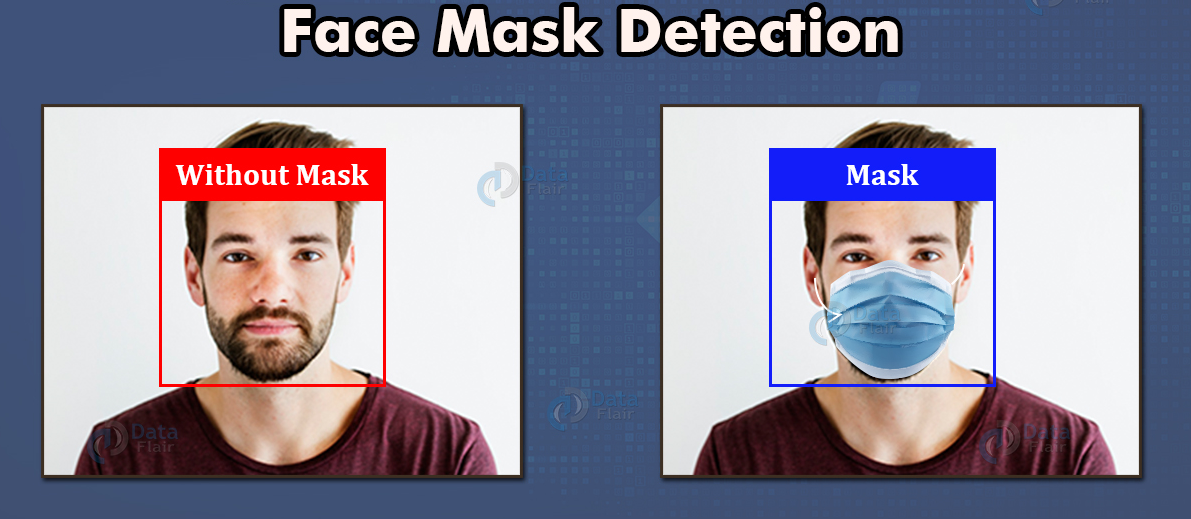

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Mon Jul 12 09:52:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Connect google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'
 data.tar
 data.tgz
 DataWarehousingHW2.gdoc
'Gate E&#38;C 2011.docx'
 GCP_speech_to_text.gdoc
 glove.840B.300d.txt
'Homework 2.gdoc'
 homework2.py.gdoc
'IMG-20201222-WA0000 (1).jpg.pdf'
 IMG-20201222-WA0000.jpg.pdf
'interview questions.gdoc'
'Ken Black - Business Statistics_ For Contemporary Decision Making (2019, John Wiley & Sons) - libgen (1).li.pdf'
'Ken Black - Business Statistics_ For Contemporary Decision Making (2019, John Wiley & Sons) - libgen.li.pdf'
 latest_cv_march_2021.pdf
 media-3ef95441.ppt
'My Drive'
'New Doc 2018-08-20.pdf'
 pythonapp.py.gdoc
'Python Second Link'
'requirements (1).gdoc'
 requirements.gdoc
'Untitled document.gdoc'
'Untitled presentation.gslides'
 yolov3


# 1) Clone, configure & compile Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15232, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 15232 (delta 22), reused 32 (delta 19), pack-reused 15185
Receiving objects: 100% (15232/15232), 13.63 MiB | 16.60 MiB/s, done.
Resolving deltas: 100% (10330/10330), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

## 2) Configure yolov3.cfg file

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=21@' cfg/yolov3_training.cfg

## 3) Create .names and .data files

In [ ]:
!echo -e 'Wearing Mask\n Not Wearing Mask' > data/obj.names

In [ ]:
!echo -e 'classes= 2\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data

### 4) Save yolov3_training.cfg and obj.names files in Google drive

In [ ]:
!cp cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_testing.cfg
!cp data/obj.names /mydrive/yolov3/classes.txt

5) Create a folder and unzip image dataset

In [ ]:
!mkdir data/obj

In [ ]:
!unzip /mydrive/yolov3/images.zip -d data/obj

Archive:  /mydrive/yolov3/images.zip
  inflating: data/obj/5f6e33e2d91a1.image.jpg  
  inflating: data/obj/5f6e33e2d91a1.image.txt  
  inflating: data/obj/5f403e14-masksoff-1021x580.jpg  
  inflating: data/obj/5f403e14-masksoff-1021x580.txt  
  inflating: data/obj/8ea05a5e-c1d3-474c-8a4c-f81061afc639.jpg  
  inflating: data/obj/8ea05a5e-c1d3-474c-8a4c-f81061afc639.txt  
  inflating: data/obj/15fb159e-7665-11ea-ab8f-988daf8efd6f_image_hires_155527.jpg  
  inflating: data/obj/15fb159e-7665-11ea-ab8f-988daf8efd6f_image_hires_155527.txt  
  inflating: data/obj/29xp-mask-mediumSquareAt3X.jpg  
  inflating: data/obj/29xp-mask-mediumSquareAt3X.txt  
  inflating: data/obj/97-people-referred-to-Public-Prosecution-for-not-wearing-masks-in-Qatar.jpg  
  inflating: data/obj/97-people-referred-to-Public-Prosecution-for-not-wearing-masks-in-Qatar.txt  
  inflating: data/obj/440nvp.jpg     
  inflating: data/obj/440nvp.txt     
  inflating: data/obj/1679_children-and-face-masks-most-large.txt  
  inf

6) Create train.txt file

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

7) Download pre-trained weights for the convolutional layers file

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-07-12 09:54:30--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  56.3MB/s    in 2.8s    

2021-07-12 09:54:33 (56.3 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



8) Start training

In [ ]:
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.913272), count: 1, class_loss = 0.000002, iou_loss = 0.010753, total_loss = 0.010755 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 47867, rewritten_bbox = 0.018802 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.786057), count: 2, class_loss = 0.125047, iou_loss = 0.059962, total_loss = 0.185009 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.803325), count: 8, class_loss = 0.306590, iou_loss = 0.203345, total_loss = 0.509935 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.003120, iou_loss = 0.000000, total_loss = 0.003120 
 total_bbox = 47877, rewritten_bbox = 0.018798 % 
v3 (mse

## Mask Detection using Opencv

In [1]:
import cv2
import numpy as np

In [2]:
net = cv2.dnn.readNet('yolov3_training_last.weights', 'yolov3_testing.cfg')

In [3]:
classes = []
with open("classes.txt", "r") as f:
    classes = f.read().splitlines()

In [4]:
cap = cv2.VideoCapture('test3.mp4')
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(100, 3))

In [5]:
while True:
    _, img = cap.read()
    height, width, _ = img.shape

    blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)
    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    layerOutputs = net.forward(output_layers_names)

    boxes = []
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.2:
                center_x = int(detection[0]*width)
                center_y = int(detection[1]*height)
                w = int(detection[2]*width)
                h = int(detection[3]*height)

                x = int(center_x - w/2)
                y = int(center_y - h/2)

                boxes.append([x, y, w, h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.4)

    if len(indexes)>0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
            cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (255,255,255), 2)

    cv2.imshow('Image', img)
    key = cv2.waitKey(1)
    if key==27:
        break

cap.release()
cv2.destroyAllWindows()